In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
vdf = pd.read_csv("..\Data\sa2_votes.csv")

In [4]:
# Get Census data for Selected Stats
cdf = pd.read_csv("..\Data\census_education_level.csv")

In [6]:
df = pd.merge(vdf, cdf, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")
df["Preferred Party"] = np.where(df["liberal/national coalition votes"] / df["totalvotes"] > 0.5, "Liberal", "ALP")

In [7]:
df.head()

,Unnamed: 0,SA2_MAIN16,STE_NAME16,GCC_CODE16,liberal/national coalition votes,australian labor party votes,totalvotes,sa2_maincode_2016,p_tot_total,p_pgrad_deg_total,...,p_cert_iii_iv_total,p_cert_i_ii_total,p_cert_lev_tot_total,post_grad_degree_percent,post_grad_dip_cert_percent,bach_degree_percent,diploma_percent,certificate_percent,bach_post_grad_percent,Preferred Party
0,0,101021007,New South Wales,1RNSW,655,850,1505,101021007,2155,170,...,558,38,685,0.078886,0.035731,0.191647,0.127146,0.317865,0.306265,ALP
1,1,101021008,New South Wales,1RNSW,600,937,1537,101021008,3543,197,...,1254,85,1478,0.055603,0.035845,0.164832,0.156082,0.417161,0.256280,ALP
2,2,101021009,New South Wales,1RNSW,7954,9937,17891,101021009,5563,464,...,1483,121,1774,0.083408,0.038648,0.230271,0.144706,0.318893,0.352328,ALP
3,3,101021010,New South Wales,1RNSW,756,1040,1796,101021010,2498,284,...,643,65,765,0.113691,0.035629,0.258207,0.153723,0.306245,0.407526,ALP
4,4,101021011,New South Wales,1RNSW,3023,3052,6075,101021011,9241,921,...,2261,146,2671,0.099665,0.050860,0.225192,0.158424,0.289038,0.375717,ALP


In [8]:
pdf = df[["STE_NAME16", "Preferred Party", "bach_post_grad_percent"]]
pdf = pdf.loc[pdf["STE_NAME16"] != "Other Territories",]
pdf = pdf.sort_values(by = ["STE_NAME16", "Preferred Party"], ascending = True)

In [9]:
cut_labels = ["Below 10%","10-20%","20-30%","30-40%","40-50%","50-60%","Above 60%"]
cut_bins = [0, .1, .2, .3, .4, .5, .6, 1]
pdf["bach_post_bins"] = pd.cut(pdf["bach_post_grad_percent"],
                               bins = cut_bins,
                               labels = cut_labels)
pdf = pdf.groupby(["Preferred Party", "bach_post_bins"]).size().reset_index(name = "Count")
pdf.head()

,Preferred Party,bach_post_bins,Count
0,ALP,Below 10%,10
1,ALP,10-20%,137
2,ALP,20-30%,202
3,ALP,30-40%,212
4,ALP,40-50%,152


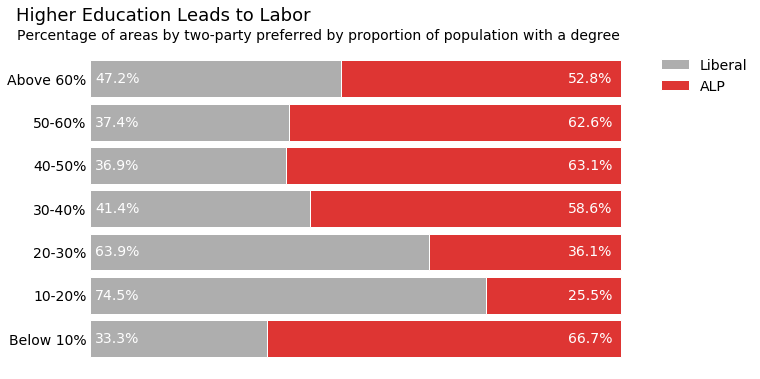

In [29]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
bar_height = 0.85
text_colour = "white"
lib_colour = "#aeaeae"
alp_colour = "#DE3533"

# Set plot values
parties = pdf.loc[:,"Preferred Party"].unique()
bach_post_bins = (pdf.loc[:,"bach_post_bins"].unique())

for bach_post_bin in bach_post_bins:
    # Find the position of the state in the list
    position = [i for i,x in enumerate(bach_post_bins) if x == bach_post_bin][0]
    
    # Calculate Lib/ALP TPP Percent
    total = sum(pdf.loc[pdf["bach_post_bins"] == bach_post_bin, "Count"])
    lib_pct = (pdf.loc[(pdf["bach_post_bins"] == bach_post_bin) & (pdf["Preferred Party"] == "Liberal"), "Count"] / total) * 100
    alp_pct = (pdf.loc[(pdf["bach_post_bins"] == bach_post_bin) & (pdf["Preferred Party"] == "ALP"), "Count"] / total) * 100
    
    # Create Horizontal Bar Chart
    axes.barh(bach_post_bin, lib_pct, color = lib_colour, edgecolor = "white", height = bar_height)
    axes.barh(bach_post_bin, alp_pct, left = lib_pct, color = alp_colour, edgecolor = "white", height = bar_height)
    
    # Add text to bars
    axes.text(1, position, s = str(round(lib_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    if alp_pct.values[0] > 0.0:
        axes.text(90, position, s = str(round(alp_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    
# Set title
axes.set_title("Percentage of areas by two-party preferred by proportion of population with a degree"
               ,fontsize = 14
               ,ma = "left"
               ,ha = "right"
               ,position= (0.95,1))
fig.suptitle("Higher Education Leads to Labor"
             ,fontsize = 18
             ,ma = "left"
             ,ha = "right"
             ,position= (0.431,0.97))

# Remove tick marks
axes.tick_params(axis = "both", length = 0, labelsize = 14)
axes.get_xaxis().set_visible(False)

 # Remove spines
axes.spines["right"].set_position(('data', 100))
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 1, box.height])
axes.legend(("Liberal","ALP"),fontsize = 14, frameon = False, bbox_to_anchor = (1, 1))

In [30]:
fig.savefig("higher_ed.png", dpi = 300, bbox_inches = "tight")